In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download princelv84/dogsvscats

Dataset URL: https://www.kaggle.com/datasets/princelv84/dogsvscats
License(s): MIT
 91% 497M/545M [00:02<00:00, 168MB/s]
100% 545M/545M [00:02<00:00, 211MB/s]


In [3]:
!unzip /content/dogsvscats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [4]:
#Import all the needed liabraries
import matplotlib.pyplot as plt
from PIL import Image
import random
import os

import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.utils import plot_model

from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import seaborn as sns




In [5]:
cat_dir_path='/content/train/cats'
dog_dir_path='/content/train/dogs'

In [6]:
len(os.listdir(cat_dir_path))

10000

In [7]:
len(os.listdir(dog_dir_path))

10000

In [8]:
#Loading some of the images Using cv2
import cv2
img=cv2.imread('/content/train/cats/cat.0.jpg')
img1=cv2.imread('/content/train/cats/cat.11.jpg')
img2=cv2.imread('/content/train/cats/cat.100.jpg')
img.shape,img1.shape,img2.shape



((374, 500, 3), (410, 431, 3), (499, 403, 3))

In [9]:
# As we can see that images have different shapes
# and we can see that we have 10000 data of each class in our datasets so loading this much of data at one time will drain up the memory and will be hard to train our model
# So we will load the image in batches for example load 1 batch of let's say 20 image train on them and free these images and load the next batch and train and so on
# So for this we will use keras-Image data Generator

In [37]:
base_dir_train='/content/train'
base_dir_test='/content/test'

datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)



In [38]:
train_generator=datagen.flow_from_directory( #since our data is in directory and not in dataframe so we use flow_from_directory
    base_dir_train,
    target_size=(150,150), #Here we are resizing out training data images
    batch_size=20,
    class_mode='binary', #Since we use binary cross entropy loss so we need binary labels
    subset='training'
)

Found 16000 images belonging to 2 classes.


In [39]:
test_generator=datagen.flow_from_directory(
    base_dir_train,
    target_size=(150,150), #Here we are resizing out validation data images
    batch_size=20,
    class_mode='binary',
    subset='validation'

)

Found 4000 images belonging to 2 classes.


In [40]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [41]:
test_generator.class_indices

{'cats': 0, 'dogs': 1}

**Building the Model**

In [42]:
model=models.Sequential([
    #Layer1
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    layers.MaxPooling2D(2,2),

    #Layer2
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    #Layer3

    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    #Layer4
    layers.Conv2D(128,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),

    #Flatten Layer
    layers.Flatten(),

    #FullyConnectedLayer
    layers.Dense(512,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
#so for 20 images the output for the first conv2D layer will we 20,148,148,3

In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [46]:
history=model.fit(train_generator,epochs=10,validation_data=test_generator)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 35s 40ms/step - accuracy: 0.5569 - loss: 0.6811 - val_accuracy: 0.6555 - val_loss: 0.6076
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6651 - loss: 0.6055 - val_accuracy: 0.6883 - val_loss: 0.5865
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7489 - loss: 0.4975 - val_accuracy: 0.7538 - val_loss: 0.4989
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8027 - loss: 0.4204 - val_accuracy: 0.8232 - val_loss: 0.3963
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.8413 - loss: 0.3574 - val_accuracy: 0.8418 - val_loss: 0.3633
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.8852 - loss: 0.2746 - val_accuracy: 0.8593 - val_loss: 0.3451
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 31s 38ms/step - accuracy: 0.9152 - loss: 0.2103 - val_accuracy: 0.8565 - val_loss: 0.3884
Epoch 8/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.9395 - loss: 0.1533 - val_accurac

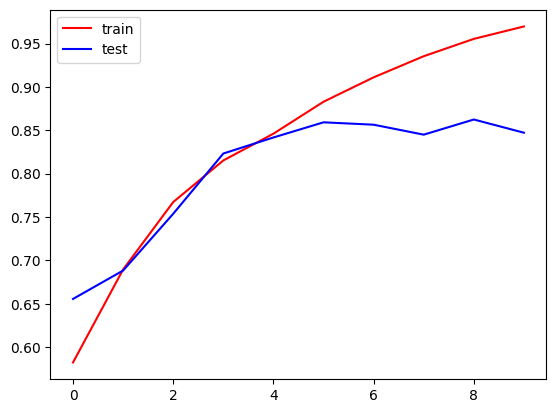

In [47]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

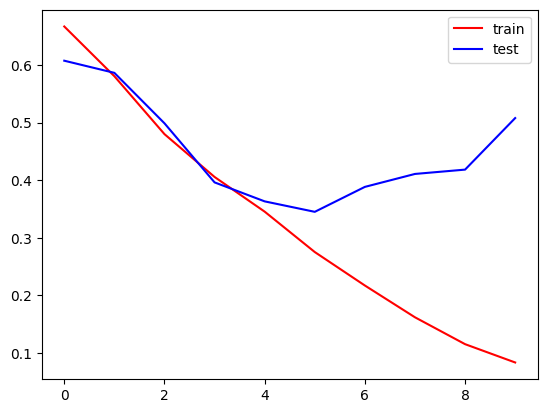

In [48]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [49]:
# As we can see that our model is overfitting as we are training for more epochs

*Testing*

In [50]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [51]:
test_ds=datagen.flow_from_directory(
    base_dir_test,
    target_size=(150,150), #Here we are resizing out training data images
    batch_size=20,
    class_mode='binary', #Since we use binary cross entropy loss so we need binary labels

)

Found 5000 images belonging to 2 classes.


In [52]:
#Evaluate the model
test_loss,test_acc=model.evaluate(test_ds,steps=len(test_ds))

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

  3/250 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.7000 - loss: 1.1582 

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.8331 - loss: 0.5832
Test Loss: 0.5294228196144104
Test Accuracy: 0.8456000089645386


*Predicting for a single Image*

In [53]:
test_img=cv2.imread('/content/Brooks_Chase_Ranger_of_Jolly_Dogs_Jack_Russell.jpg')

In [54]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

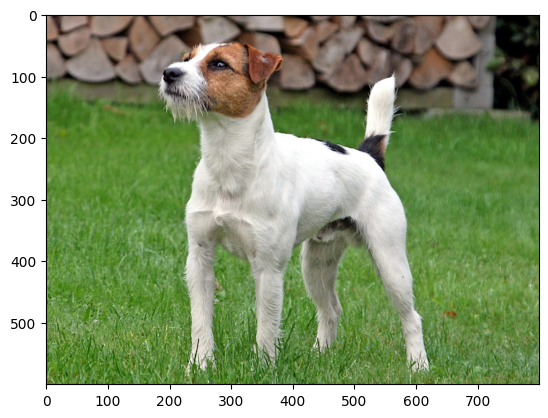

In [55]:
plt.imshow(test_img)

In [56]:
test_img.shape

(600, 800, 3)

In [57]:
#We need to resize our image

In [58]:
test_img=cv2.resize(test_img,(150,150))

In [59]:
#the model will be expecting the input in x,150,150,3 shape since we are having one image the shape should be 1,150,150,3
test_input = test_img.astype('float32')
test_input=test_input.reshape((1,150,150,3))

In [60]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [61]:
#As we saw earlier 1 is for dogs so our model is predicting correctly for a single data

In [62]:
#Now let's test it for a cat image

In [63]:
test_img=cv2.imread('//content/Cat_August_2010-4.jpg')

In [64]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

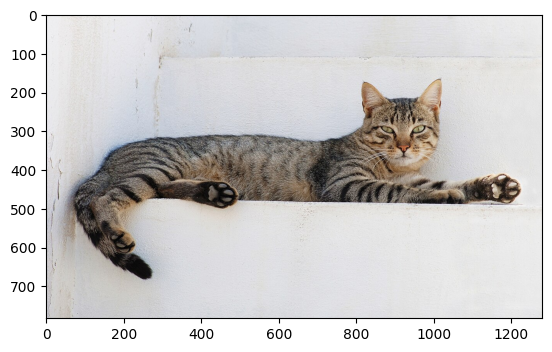

In [65]:
plt.imshow(test_img)

In [66]:
test_img.shape

(783, 1280, 3)

In [67]:
test_img=cv2.resize(test_img,(150,150))

In [68]:

test_input = test_img.astype('float32')
test_input=test_input.reshape((1,150,150,3))

In [69]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)

In [70]:
# And 0 represents cat